In [4]:
from scipy.interpolate import griddata as GD
from astropy.coordinates import SkyCoord
from pyshtools import legendre as pleg
from sunpy.coordinates import frames
from scipy.integrate import simps
import matplotlib.pyplot as plt
from math import sqrt, pi, e
from astropy.io import fits
import astropy.units as u
import numpy as np
import sunpy.map
import argparse
import time
import os

homeDir = "/home/g.samarth/"
scratchDir = "/scratch/g.samarth/"

import sys; sys.path.append( homeDir )
from heliosPy import datafuncs as cdata
from heliosPy import mathfuncs as cmath
from heliosPy import iofuncs as cio
%matplotlib inline

## Figure 1
The first figure is the raw dopplergram downloaded from JSOC.

In [6]:
hmiDataDir = scratchDir + "HMIDATA/v720s_dConS/2018/"
hmiDataFileNames = hmiDataDir + "HMI_2018_filenames"
plotDir = scratchDir + "plots/dopplervel/"

with open(hmiDataFileNames, mode="r") as f:
    hmiFiles = f.read().splitlines()

print(hmiDataDir + hmiFiles[0])


hmi_map = sunpy.map.Map(hmiDataDir + hmiFiles[0])
B0 = hmi_map.observer_coordinate.lat
P0 = hmi_map.observer_coordinate.lon
x, y = np.meshgrid(*[np.arange(v.value) for v in hmi_map.dimensions]) * u.pix
hpc_coords = hmi_map.pixel_to_world(x, y)
r = np.sqrt(hpc_coords.Tx ** 2 + hpc_coords.Ty ** 2) / hmi_map.rsun_obs
rcrop = 0.95
maskR = r>rcrop

hmi_map.data[maskR] = np.nan
r[maskR] = np.nan

hpc_hgf = hpc_coords.transform_to(frames.HeliographicStonyhurst)
hpc_hc = hpc_coords.transform_to(frames.Heliocentric)

mapData = hmi_map.data.copy()

maskNaN = ~np.isnan(mapData)
maxData = mapData[maskNaN].max()
minData = mapData[maskNaN].min()
maxx = max(abs(maxData), abs(minData))
print(maxData, minData)
del mapData, maxData, minData


/scratch/g.samarth/HMIDATA/v720s_dConS/2018/hmi.V_720s_dconS.20180101.fits


/home/g.samarth/anaconda3/envs/py3/lib/python3.7/site-packages/astropy/coordinates/distances.py:183: RuntimeWarning: invalid value encountered in less
  if not allow_negative and np.any(distance.value < 0):
/home/g.samarth/anaconda3/envs/py3/lib/python3.7/site-packages/astropy/coordinates/angles.py:642: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/home/g.samarth/anaconda3/envs/py3/lib/python3.7/site-packages/astropy/coordinates/angles.py:529: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/home/g.samarth/anaconda3/envs/py3/lib/python3.7/site-packages/astropy/coordinates/angles.py:529: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/home/g.samarth/anaconda3/envs/py3/lib/python3.7/site-packages/astropy/coordinates/angles.py:642: RuntimeWarning: invalid value enco

3840.0 -4636.0


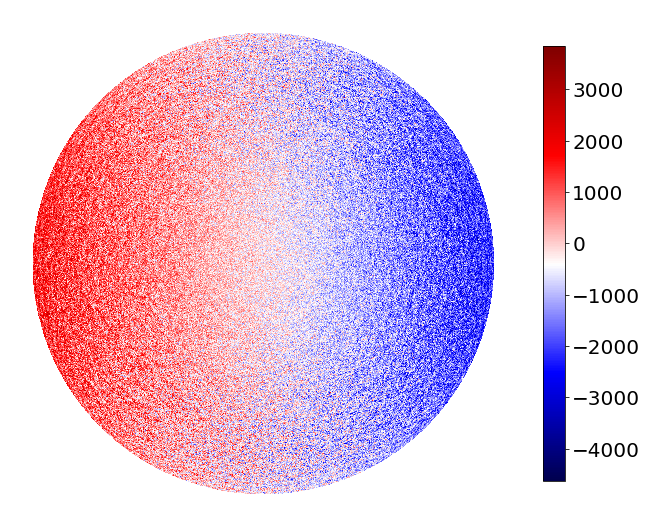

In [7]:
plt.close()
plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 20})
im = plt.imshow(hmi_map.data, cmap='seismic', interpolation="none")
plt.colorbar(im, fraction=0.039, pad=0.04)
plt.axis("off")
#plt.savefig(plotDir + "rawMap.png", dpi=500)
plt.show()